In [1]:
import numpy as np
import matplotlib.pyplot as plt 

RAW_total = np.genfromtxt("Imagenes/RAW/RAW.txt")

In [2]:
def conv(IM):
    kernel = np.array([[1,1,1],[1,0,1],[1,1,1]])/8
    filas_IM = np.shape(IM)[0]
    columnas_IM = np.shape(IM)[1]
    sobrante_filas = int((np.shape(kernel)[0]- 1)/2)
    sobrante_columnas = int((np.shape(kernel)[1]- 1)/2)
    IM_pad = np.zeros((filas_IM + 2*sobrante_filas, columnas_IM + 2*sobrante_columnas))
    IM_pad[sobrante_filas:filas_IM + sobrante_filas, sobrante_columnas:columnas_IM + sobrante_columnas] = IM
    
    filas_IM_pad = np.shape(IM_pad)[0]
    columnas_IM_pad = np.shape(IM_pad)[1]

    for i in range(filas_IM_pad):
        for j in range(columnas_IM_pad):
            if(IM_pad[i,j]==0 and i>=sobrante_filas and i<= (filas_IM_pad-1) - sobrante_filas and j >=sobrante_columnas and j<= (columnas_IM_pad -1) - sobrante_columnas ):
                IM_pad[i,j] = np.sum(kernel*IM_pad[i-sobrante_filas:i+sobrante_filas+1,j-sobrante_columnas:j+sobrante_columnas+1])
    
    return IM_pad[sobrante_filas:filas_IM + sobrante_filas, sobrante_columnas:columnas_IM + sobrante_columnas]

#def corregir_imagenes_RAW(IMs, threshold_sup, threshold_inf):
#    for i,IM in enumerate(IMs):
#        indxs_sup = np.where(IM >= threshold_sup)
#        IM[indxs_sup[0], indxs_sup[1]] = 0
#        indxs_inf = np.where(IM <= threshold_inf)
#        IM[indxs_inf[0], indxs_inf[1]] = 0
#        IMs[i] = conv(IM)       

def corregir_imagen(IM, threshold_sup, threshold_inf):
    indxs_sup = np.where(IM >= threshold_sup)
    IM[indxs_sup[0], indxs_sup[1]] = 0
    indxs_inf = np.where(IM <= threshold_inf)
    IM[indxs_inf[0], indxs_inf[1]] = 0
    return conv(IM) 

In [3]:
altura_del_detector = 256
numero_de_imagenes = int(np.shape(RAW_total)[0]/altura_del_detector)
RAWs = []

for i in range(numero_de_imagenes):
    RAWs.append( np.transpose(RAW_total[256*i:256*(i+1),:]) )

del RAW_total
RAWs = np.array(RAWs)
print(np.shape(RAWs))

(349, 256, 256)


In [4]:
numero_de_FF = 720

FFs = []

for i in range(numero_de_FF):
    FF = np.genfromtxt("Imagenes/FF/FF_{:03}.txt".format(i))
    FFs.append(np.transpose(FF))

FFs = np.array(FFs)
FF_total = np.sum(FFs, axis=0) # Suma de los elementos dentro del array
del FFs



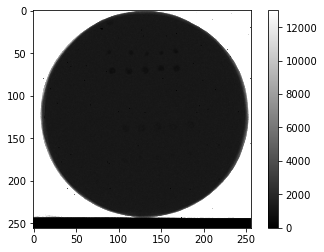

In [5]:
plt.imshow(RAWs[0], cmap="gray", vmin=0, vmax=13000)
plt.colorbar()
plt.show()

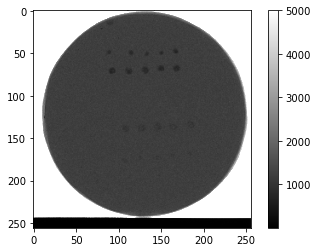

In [6]:
for i,RAW in enumerate(RAWs):
    RAWs[i] = corregir_imagen(RAW, 20000, 0)

plt.imshow(RAWs[0], cmap="gray", vmax=5000)
plt.colorbar()
plt.show()

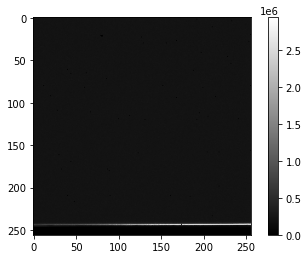

In [7]:
plt.imshow(FF_total, cmap="gray")
plt.colorbar()
plt.show()

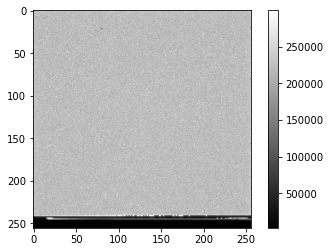

In [8]:
FF = corregir_imagen(FF_total, 0.3E6, 0.0)

plt.imshow(FF, cmap="gray")
plt.colorbar()
plt.show()

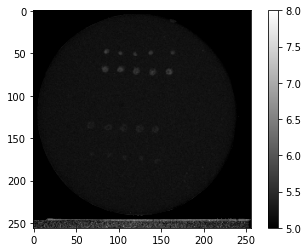

In [9]:
IM_corr = np.log(FF/RAWs)

plt.imshow(IM_corr[300], cmap="gray", vmin=5, vmax=8)
plt.colorbar()
plt.show()

In [10]:
for i,im in enumerate(IM_corr):
    np.savetxt("Imagenes/CORR/corr_{}.txt".format(i), im)